## Giriş Kavramları - Veri ile Tanışma

Makine Öğrenmesi aslıda Veriyi Anlama çabasıdır. Anlama ve Anlamlandırma.

Bu çabanın meyvesine Öğrenme (Learning) diyoruz ve öğrenme iki temel kategoride görülebilir:
* Supervised Learning (Gözetimli Öğrenme)
* Unsupervised Learning (Gözetimsiz Öğrenme)

**Supervised Learning:**

Gözetimli Öğrenmede, ne oldukları net olarak verilmiş girdiler kullanarak bir çıktı elde etmeye çalışırız.

Burada girdilerin aslında hangi çıktıya ait olduğu başta verilmiştir.

Bilmediğimiz ise yeni bir girdi geldiğinde, onun çıktısının ne olacağıdır.

İşte bunu tahminlemek için elimizdeki girdi-çıktı ilişkilerine bakarız.

**Unsupervised Learning:**

Gözetimsiz Öğrenmede elimizde girdiler vardır ancak çıktılar yoktur.

Hangi girdinin, hangi çıktıya karşılık geldiğini bilmeyiz.

Bu sebeple, çıktıyı tahmin etmeye çalışmak olanaksızdır.

Bunun yerine girdiler arasındaki ilişkiye odaklanırız.

Böylece kümeleme yaparak, hangi girdinin başka hangi girdi ile ilişkili olduğunu ve bu ilişkinin derecesini anlamaya çalışırız.

### Supervised Learning

**Örnek:**

**Maaş Verisi**

ABD Atlantik Bölgesindeki bir grup erkek çalışanlara ait maaş verisidir.

Bu veri setinde, `çalışanın maaşı` ile `yaşı`, `eğitim durumu` ve `tecrübe yılı` arasındaki ilişkiyi anlamaya çalışacağız.

In [20]:
# import

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('Wage.csv')

In [6]:
df.describe()  #İstatiksel veriler verir.

,Unnamed: 0,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,218883.373000,2005.791000,42.414667,4.653905,111.703608
std,145654.072587,2.026167,11.542406,0.351753,41.728595
min,7373.000000,2003.000000,18.000000,3.000000,20.085537
25%,85622.250000,2004.000000,33.750000,4.447158,85.383940
50%,228799.500000,2006.000000,42.000000,4.653213,104.921507
75%,374759.500000,2008.000000,51.000000,4.857332,128.680488
max,453870.000000,2009.000000,80.000000,5.763128,318.342430


In [7]:
df.head(10)  #Data da ilk 10 veriyi getirdi

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
5,376662,2008,54,1. Male,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.115744
6,450601,2009,44,1. Male,2. Married,4. Other,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.133021,169.528538
7,377954,2008,30,1. Male,1. Never Married,3. Asian,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.716003,111.720849
8,228963,2006,41,1. Male,1. Never Married,2. Black,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.778151,118.884359
9,81404,2004,52,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.857332,128.680488


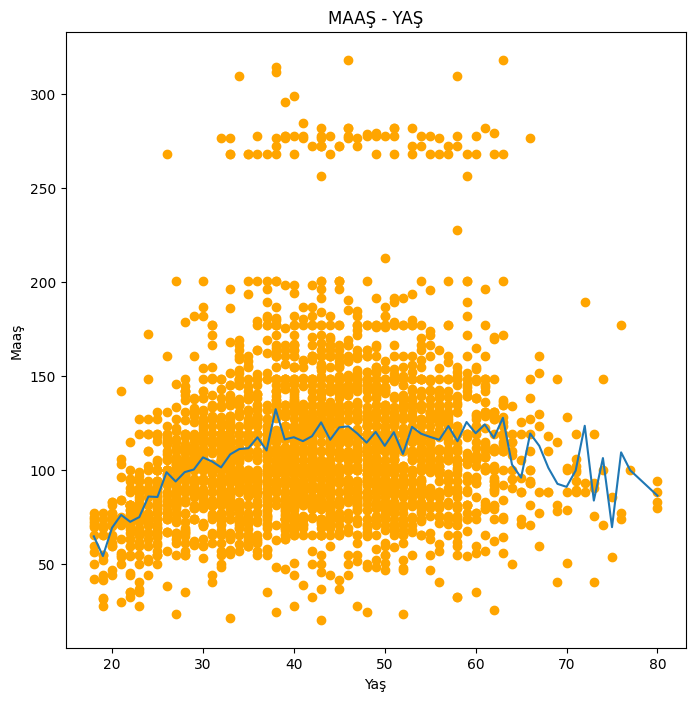

In [8]:
# MAAŞ - YAŞ

df1 = df[['age', 'wage']]

# girdi -> input, feature -> X
X = df1['age']

# çıktı -> output, label -> y
y = df1['wage']

# ortalama hesapla
y_mean = df1.groupby('age').mean()

# grafiği hazırla
fig, ax = plt.subplots(figsize=(8, 8))

# datayı çiz
ax.scatter(X, y, color='orange')  #dağılım grafiği

# ortalamayı çiz
ax.plot(y_mean.index, y_mean)

# grafiği formatla
plt.title('MAAŞ - YAŞ')
plt.xlabel('Yaş')
plt.ylabel('Maaş')
plt.show()

Yaş ilerledikçe belli bir yaşa gelene kadar maaş artıyor.

In [10]:
#y deki ortalamayı hesapla
y_mean  

,wage
age,
18,64.493063
19,53.990486
20,69.033341
21,75.906952
22,72.251667
...,...
74,106.192881
75,69.389644
76,109.219665


In [11]:
y_mean.index

Index([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 80],
      dtype='int64', name='age')

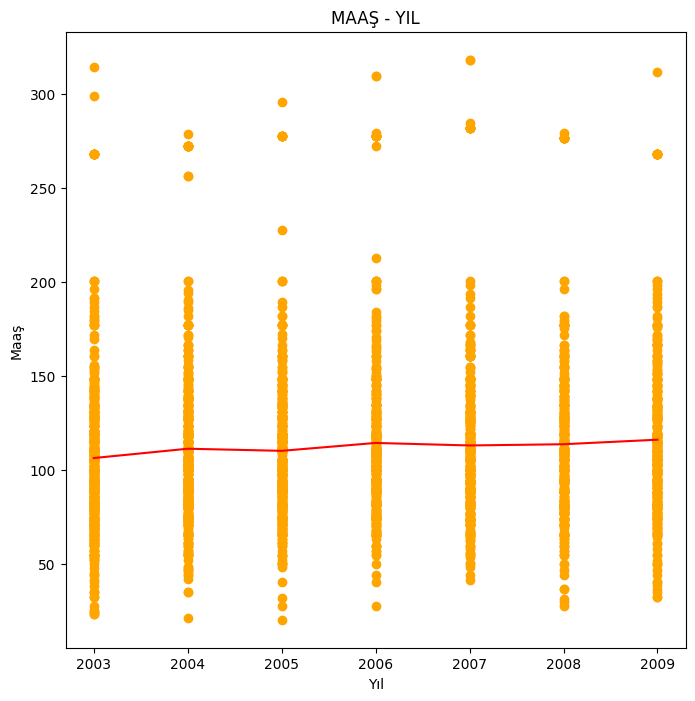

In [12]:
# MAAŞ - YIL

df2 = df[['year', 'wage']]

# girdi -> feature -> X
X = df2['year']

# çıktı -> output, label -> y
y = df2['wage']

# ortalama hesapla
y_mean = df2.groupby('year').mean()

# grafiği hazırla
fig, ax = plt.subplots(figsize=(8,8))

# datayı çiz
ax.scatter(X, y, color='orange')

# ortalamayı çiz
ax.plot(y_mean.index, y_mean, color='red')

# grafiği formatla
plt.title('MAAŞ - YIL')
plt.xlabel('Yıl')
plt.ylabel('Maaş')
plt.show()

<Axes: >

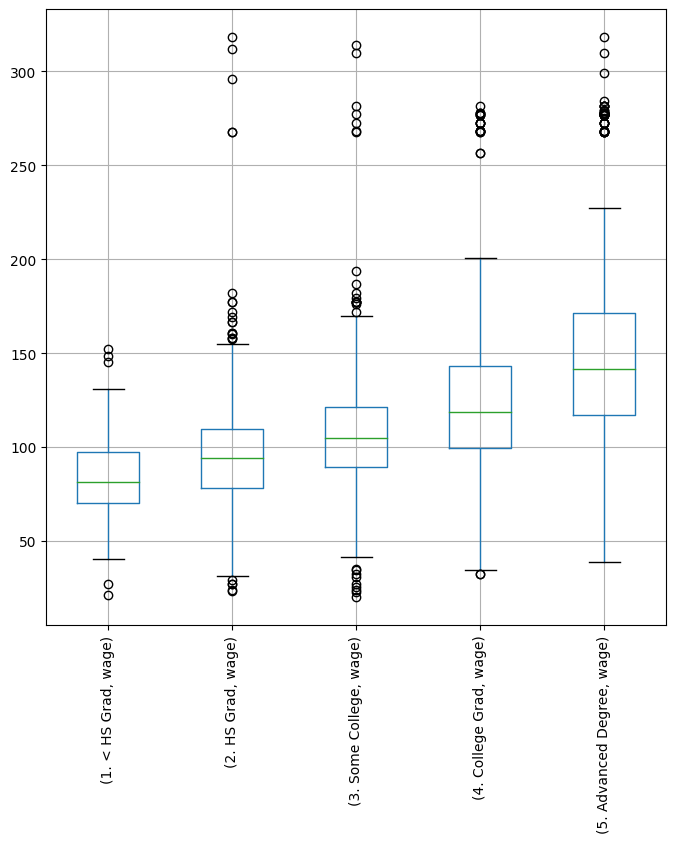

In [13]:
# MAAŞ - EĞİTİM DÜZEYİ

# boxplot

df3 = df[['education', 'wage']]

# X -> input
X = df3['education']

# y -> label
y = df3['wage']

# eğitim üzerinden gruplandır
y_grouped = df3.groupby('education')

y_grouped.boxplot(subplots=False, figsize=(8,8), rot=90)

# boxplot -> Quartile -> %25  istatiksel değerle verir

Eğitim düzeyiyle maaş arasında lineere benzeyen bir ilişki var.Eğitim düzeyi arttıkça maaş da artıyor.

In [14]:
y_grouped.head()

,education,wage
0,1. < HS Grad,75.043154
1,4. College Grad,70.476020
2,3. Some College,130.982177
3,4. College Grad,154.685293
4,2. HS Grad,75.043154
5,4. College Grad,127.115744
6,3. Some College,169.528538
7,3. Some College,111.720849
8,3. Some College,118.884359
9,2. HS Grad,128.680488


**Örnek:**

**Hisse Senedi Piyasası**

Maaş Verilerinde sürekli/sayısal olan bir değişkeni tahmin etmeye çalıştık.

Fakat çoğu zaman sayısal olmayan, kategorik veriler üzerinde çalışırız.

Bu örneğimizde, Standard & Poor's 500 (S&P) indexinin 5 yıllık verisi üzerinde çalışacağız.

Amacımız, herhangi bir gün için index aşağı mı inecek, yoksa yukarı mı çıkacak bunu tahminlemek.

Dolayısı ile, sayısal bir sonuç bulmak değil, aşağı-yukarı şeklindeki iki kategoriden birini bulmak.

Maaş Verisi örneğimiz aslında bir Regresyon Analizi, Hisse Senedi ise bir Sınıflandırma (Classification).

In [15]:
# import edelim

import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('Smarket.csv')

In [17]:
df.describe()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,625.500000,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,360.988227,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,1.000000,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,313.250000,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,625.500000,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,937.750000,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,1250.000000,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [18]:
df.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


<Axes: >

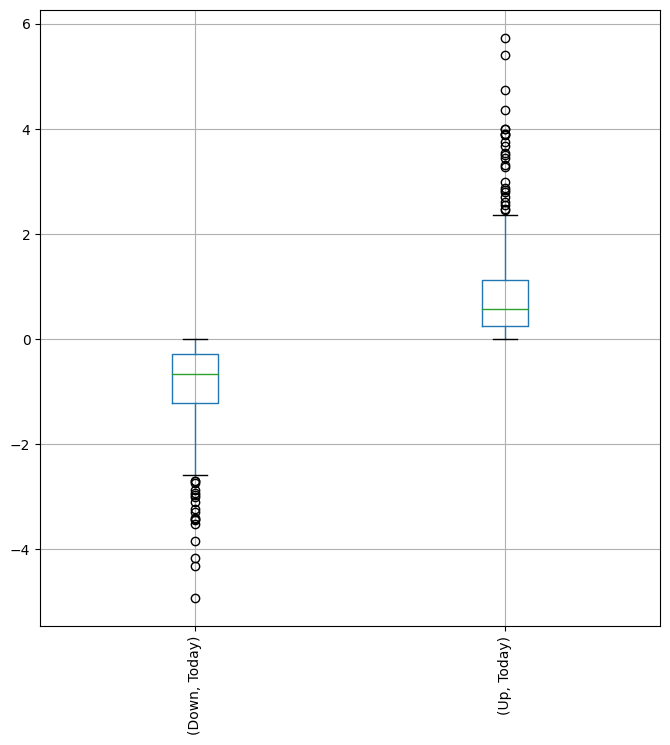

In [22]:
# BUGÜNKÜ FİYAT - ÖNCEKİ GÜN FİYATI

df4 = df[['Today', 'Direction']]

# girdi -> X
X = df4['Today']

# çıktı -> y
y = df4['Direction']

# boxplot
y_grouped = df4.groupby('Direction')

y_grouped.boxplot(subplots=False, rot=90, figsize=(8,8))

Grafikte biri negatif ama bize büyüklük lazım.Negatifleri yönetmemiz gerekiyor.Bunu tanımlarken değişkenlerden önce tanımlamamız önemli.

<Axes: >

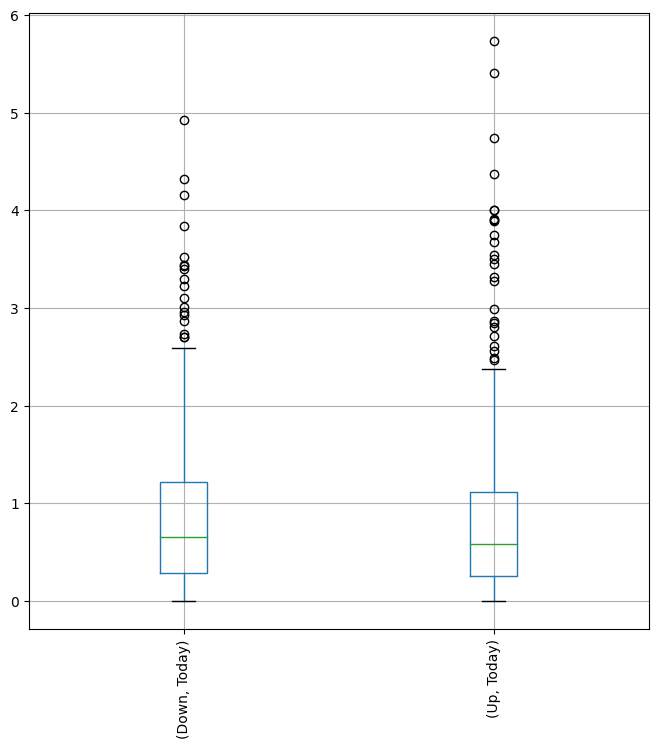

In [21]:
# BUGÜNKÜ FİYAT - ÖNCEKİ GÜN FİYATI

df4 = df[['Today', 'Direction']]

# negatifleri yönet
df4['Today'] = df4['Today'].abs()

# girdi -> X
X = df4['Today']

# çıktı -> y
y = df4['Direction']

# boxplot
y_grouped = df4.groupby('Direction')

y_grouped.boxplot(subplots=False, rot=90, figsize=(8,8))

In [23]:
#Her sınıftan kaç tane olduğunu bulduk.
y_grouped.count()

,Today
Direction,
Down,602
Up,648


Gördüğünüz gibi, hisse senetlerinin bugünkü fiyatının aşağı mı yoksa yukarı mı olacağına bir önceki gün fiyatı üzerinden gidemiyoruz.

Sağlıklı bir sonuç vermiyor.

**base oran:** default oran - %50

1250 kayıttan 602 bir önceki güne göre düşmüş, 648 ise yükselmiş. 

Neredeyse yarı yarıya. Yani %50.

Zaten olasılık da %50 dir, ya yukarı ya da aşağı inecektir.



### Unsupervised Learning

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [30]:
df = pd.read_csv('NCI60.csv')

In [31]:
df.head(10)

,Unnamed: 0,data.1,data.2,data.3,data.4,data.5,data.6,data.7,data.8,data.9,...,data.6822,data.6823,data.6824,data.6825,data.6826,data.6827,data.6828,data.6829,data.6830,labs
0,V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,...,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000,CNS
1,V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,...,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039,CNS
2,V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,...,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000,CNS
3,V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,...,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000,RENAL
4,V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,...,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000,BREAST
5,V6,0.310000,-0.030000,-0.100000,-0.460000,-0.205000,-5.400000e-01,-0.640000,-0.585000,-0.770000,...,0.000000,-0.740000,-2.095000,-1.390020,-0.400000,0.699990,0.290000,0.550000,0.000000,CNS
6,V7,-0.830000,0.000000,0.130000,-1.630000,0.075000,-3.600000e-01,0.100000,0.155000,-0.290000,...,-0.220000,-0.030000,-0.495000,0.929980,0.470000,0.129990,-0.300000,0.570000,0.000000,CNS
7,V8,-0.190000,-0.870000,-0.450000,0.080000,0.005000,3.500000e-01,-0.040000,-0.265000,-0.310000,...,-0.170000,-0.420000,-0.395000,-0.570020,-0.090000,-0.700010,-0.540000,-0.450000,-2.090000,BREAST
8,V9,0.460000,0.000000,1.150000,-1.400000,-0.005000,-7.000000e-01,-0.920000,-0.515000,-0.280000,...,0.560000,0.410000,0.705000,-0.200019,-0.330000,-0.600010,0.830000,-0.030000,0.650000,NSCLC
9,V10,0.760000,1.490000,0.280000,0.100000,-0.525000,3.600000e-01,0.600000,0.175000,0.580000,...,-0.590000,-0.410000,-0.375000,-1.150020,-0.330000,-1.220010,-0.170000,-0.110000,-1.790000,NSCLC


In [41]:
# input -> feature -> X
X = df.iloc[:, 1:6831]  #Unnamed kısmını sildik
X

,data.1,data.2,data.3,data.4,data.5,data.6,data.7,data.8,data.9,data.10,...,data.6821,data.6822,data.6823,data.6824,data.6825,data.6826,data.6827,data.6828,data.6829,data.6830
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,-0.400019,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000
60,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,-0.560020,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000
61,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.160020,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000
62,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,0.065019,...,0.889980,-0.420000,-0.460000,-0.855000,-0.160020,-0.350000,-0.360010,-0.490000,0.010000,-1.720000


In [32]:
# scale -> yeniden boyutlandır -> aynı ölçüleri getir

sc = StandardScaler()

In [51]:
X = df.
X_scaled = sc.fit_transform(X)   #Buradaki hataya bak
X_scaled

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.959  1.032 -0.623  0.13  -0.298 -0.489].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [50]:
X_scaled = sc.fit_transform(X.reshape(-1, 1))
X_scaled

array([[ 1.26868695],
       [ 1.3788763 ],
       [-1.11925208],
       [ 0.0173586 ],
       [-0.62868306],
       [-0.9169867 ]])

In [56]:
# Principal Component Analysis
# Önemli olan genler (2 adet) -> PCA

pca = PCA(n_components=2)

In [53]:
pca_result = pca.fit_transform(X_scaled)

ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

In [54]:
X_2d = X.reshape(-1, 1)
X_scaled = scaler.fit_transform(X_2d)


In [58]:
from sklearn.decomposition import PCA

# Create an instance of PCA
pca = PCA()

# Fit the PCA model to your data
pca.fit(X)

# Access the explained variance ratio
explained_variance = pca.explained_variance_ 

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.959  1.032 -0.623  0.13  -0.298 -0.489].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [57]:
print('Eigenvalues')
pca.explained_variance_

Eigenvalues


AttributeError: 'PCA' object has no attribute 'explained_variance_'

In [61]:
print('Variances (Percentage)')
pca.explained_variance_ratio_ * 100

Variances (Percentage)


array([11.35894186,  6.75620226])

In [63]:
principalDf = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

In [64]:
principalDf.head(10)

,PC1,PC2
0,-19.838040,-3.556373
1,-23.089215,-6.441710
2,-27.456189,-2.460752
3,-42.816782,9.766494
4,-55.418588,5.203979
5,-27.177996,-6.784182
6,-31.445938,-3.863621
7,-22.332310,-10.400502
8,-14.289917,-16.109187
9,-29.748282,-23.982870


In [66]:
finalDf = pd.concat([principalDf, df[['labs']]], axis=1)

In [67]:
finalDf.head(10)

,PC1,PC2,labs
0,-19.838040,-3.556373,CNS
1,-23.089215,-6.441710,CNS
2,-27.456189,-2.460752,CNS
3,-42.816782,9.766494,RENAL
4,-55.418588,5.203979,BREAST
5,-27.177996,-6.784182,CNS
6,-31.445938,-3.863621,CNS
7,-22.332310,-10.400502,BREAST
8,-14.289917,-16.109187,NSCLC
9,-29.748282,-23.982870,NSCLC


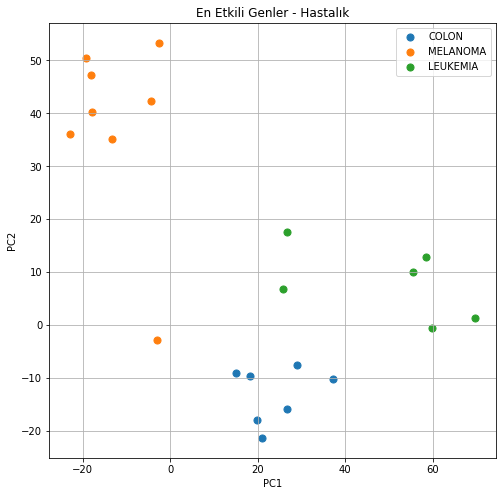

In [71]:
# Plot PCA

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('En Etkili Genler - Hastalık')

targets = ['COLON', 'MELANOMA', 'LEUKEMIA']

for target in targets:
    indexler = finalDf['labs'] == target
    ax.scatter(finalDf.loc[indexler, 'PC1'],
               finalDf.loc[indexler, 'PC2'], s = 50)
    
ax.legend(targets, loc='upper right')
ax.grid()